
For Strike Price (K) = 90
--------------------------------------------
Asian Call Option Price: 	 10.91949013121872
Variance in Asian Call Option Price:  59.02840108314932
--------------------------------------------
--------------------------------------------
Asian Put Option Price: 	 0.2967833159596362
Variance in Asian Put Option Price:  1.5141871979096468
--------------------------------------------

For Strike Price (K) = 105
--------------------------------------------
Asian Call Option Price: 	 1.4786831263414606
Variance in Asian Call Option Price:  11.66333929432268
--------------------------------------------
--------------------------------------------
Asian Put Option Price: 	 6.042979542787554
Variance in Asian Put Option Price:  34.78375149504227
--------------------------------------------

For Strike Price (K) = 110
--------------------------------------------
Asian Call Option Price: 	 0.6159957221749607
Variance in Asian Call Option Price:  5.478718525035946
-------

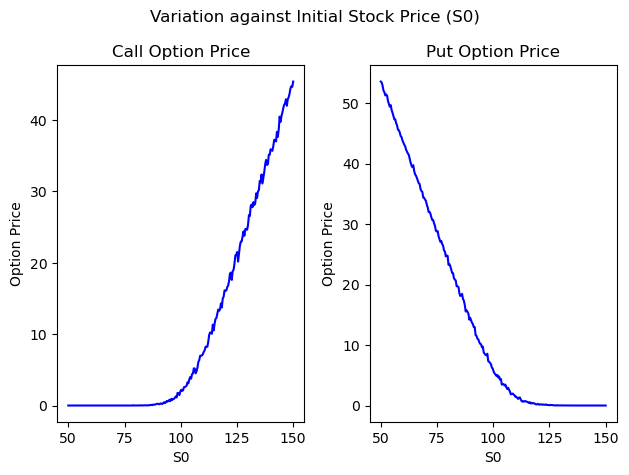

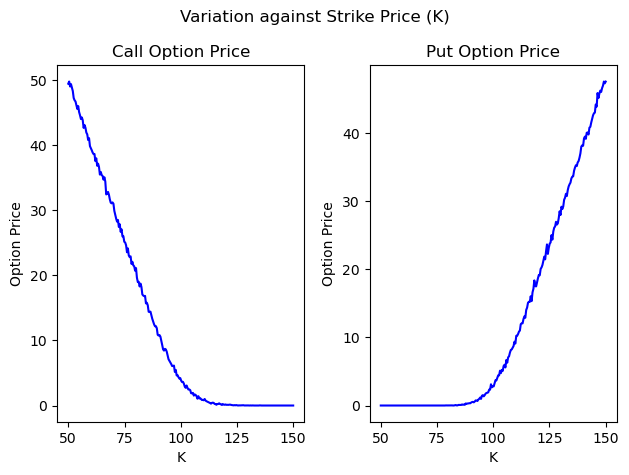

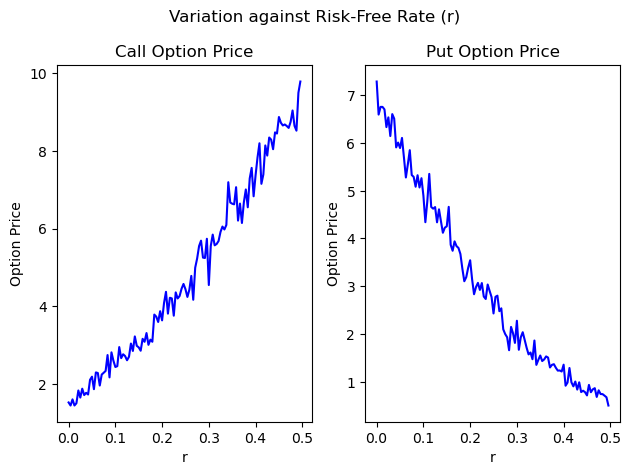

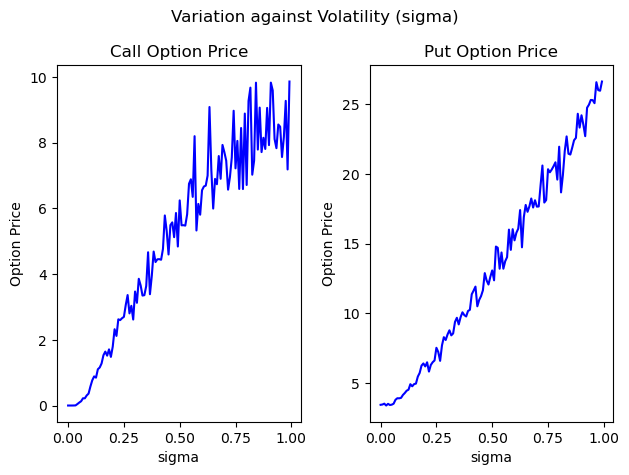

([0.0,
  0.0,
  0.0,
  0.0010479628936876494,
  0.003547449297520339,
  0.045068489203946516,
  0.09042629219947541,
  0.13014985925372263,
  0.21993857063183014,
  0.219617363884038,
  0.3065170214584912,
  0.3624018504864756,
  0.5796318720734637,
  0.7682846641841574,
  0.8863752376858997,
  0.8482658346295029,
  1.102665049720437,
  1.1572330271677318,
  1.2796490843739308,
  1.5298932277705695,
  1.640493712846479,
  1.5170042183651093,
  1.708211643729931,
  1.4791803107810406,
  1.7909000895737146,
  2.3213447220619416,
  2.116816523789553,
  2.6230720139740216,
  2.5988179430249696,
  2.6560822450622417,
  2.6970631869511403,
  3.0590736793744724,
  3.36015941455987,
  2.802563431949404,
  3.0333710139752266,
  2.615695813680588,
  3.4676512788552727,
  3.1247879931246554,
  3.8557298866311376,
  3.6545274470941522,
  3.3447196925868257,
  3.3565049728005705,
  3.636699476456187,
  4.662345527024065,
  3.385584239691425,
  3.9455161088281963,
  4.683520729337444,
  4.3642044078

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random


np.random.seed(42)

cnt = 0
# Function to generate stock prices using Geometric Brownian Motion (GBM) model
def generate_stock_prices(S_0, mu, sigma, n, cnt):
    dt = 1.0/252
    W_t = np.random.normal(0, 1, n)
    prices = []
    for i in range(n):
        S_t = S_0 * math.exp((mu - sigma**2) * dt + sigma * math.sqrt(dt) * W_t[i])
        prices.append(S_t)
        S_0 = S_t
    return prices

# Function to compute stock price paths
def plot_stock_price_paths(S_0, mu, sigma, heading, cnt):
    n = 252
    x = np.arange(n)
    for _ in range(10):
        prices = generate_stock_prices(S_0, mu, sigma, n, cnt)
        plt.plot(x, prices)
    plt.xlabel('Time, t (in days)')
    plt.ylabel('Stock prices, S(t)')
    plt.title(heading)
    plt.show()

# Function to calculate Asian option price
def asian_option_pricing(S_0, r, sigma, K, max_iter=1000, path_length=126, n=126):
    dt = 1/252
    call_option_payoffs, put_option_payoffs = [], []

    for _ in range(max_iter):
        S = generate_stock_prices(S_0, r, sigma, path_length, cnt)
        V_call = max(np.mean(S) - K, 0)
        V_put = max(K - np.mean(S), 0)

        call_option_payoffs.append(math.exp(-r*n*dt) * V_call)
        put_option_payoffs.append(math.exp(-r*n*dt) * V_put)

    return np.mean(call_option_payoffs), np.mean(put_option_payoffs), np.var(call_option_payoffs), np.var(put_option_payoffs)

# Function to visualize variation with initial stock price (S0)
def visualize_variation_with_S0(r, sigma, K, display, cnt):
    S0_values = np.linspace(50, 150, num=250)
    call_prices, put_prices = [], []

    for S0 in S0_values:
        call_price, put_price, _, _ = asian_option_pricing(S0, r, sigma, K, 500, 150, 100)
        call_prices.append(call_price)
        put_prices.append(put_price)
  
    if display:
        fig, axes = plt.subplots(nrows=1, ncols=2)
        axes[0].plot(S0_values, call_prices, color='blue')
        axes[0].set_title('Call Option Price') 
        axes[1].plot(S0_values, put_prices, color='blue')
        axes[1].set_title('Put Option Price') 
        plt.suptitle("Variation against Initial Stock Price (S0)")
        axes[0].set_xlabel('S0')
        axes[0].set_ylabel('Option Price')
        axes[1].set_xlabel('S0')
        axes[1].set_ylabel('Option Price')
        plt.tight_layout()
        plt.show()
    
    return call_prices, put_prices

# Function to visualize variation with strike price (K)
def visualize_variation_with_K(S0, r, sigma, display, cnt):
    K_values = np.linspace(50, 150, num=250)
    call_prices, put_prices = [], []

    for K in K_values:
        call_price, put_price, _, _ = asian_option_pricing(S0, r, sigma, K, 500, 150, 100)
        call_prices.append(call_price)
        put_prices.append(put_price)
  
    if display:
        fig, axes = plt.subplots(nrows=1, ncols=2)
        axes[0].plot(K_values, call_prices, color='blue')
        axes[0].set_title('Call Option Price') 
        axes[1].plot(K_values, put_prices, color='blue')
        axes[1].set_title('Put Option Price') 
        plt.suptitle("Variation against Strike Price (K)")
        axes[0].set_xlabel('K')
        axes[0].set_ylabel('Option Price')
        axes[1].set_xlabel('K')
        axes[1].set_ylabel('Option Price')
        plt.tight_layout()
        plt.show()

    return call_prices, put_prices

# Function to visualize variation with risk-free rate (r)
def visualize_variation_with_r(S0, sigma, K, display, cnt):
    r_values = np.linspace(0, 0.5, num=120, endpoint=False)
    call_prices, put_prices = [], []

    for r in r_values:
        call_price, put_price, _, _ = asian_option_pricing(S0, r, sigma, K, 500, 150, 100)
        call_prices.append(call_price)
        put_prices.append(put_price)
  
    if display:
        fig, axes = plt.subplots(nrows=1, ncols=2)
        axes[0].plot(r_values, call_prices, color='blue')
        axes[0].set_title('Call Option Price') 
        axes[1].plot(r_values, put_prices, color='blue')
        axes[1].set_title('Put Option Price') 
        plt.suptitle("Variation against Risk-Free Rate (r)")
        axes[0].set_xlabel('r')
        axes[0].set_ylabel('Option Price')
        axes[1].set_xlabel('r')
        axes[1].set_ylabel('Option Price')
        plt.tight_layout()
        plt.show()

    return call_prices, put_prices

# Function to visualize variation with volatility (sigma)
def visualize_variation_with_sigma(S0, r, K, display, cnt):
    sigma_values = np.linspace(0, 1, num=120, endpoint=False)
    call_prices, put_prices = [], []

    for sigma in sigma_values:
        call_price, put_price, _, _ = asian_option_pricing(S0, r, sigma, K, 500, 150, 100)
        call_prices.append(call_price)
        put_prices.append(put_price)
  
    if display:
        fig, axes = plt.subplots(nrows=1, ncols=2)
        axes[0].plot(sigma_values, call_prices, color='blue')
        axes[0].set_title('Call Option Price') 
        axes[1].plot(sigma_values, put_prices, color='blue')
        axes[1].set_title('Put Option Price') 
        plt.suptitle("Variation against Volatility (sigma)")
        axes[0].set_xlabel('sigma')
        axes[0].set_ylabel('Option Price')
        axes[1].set_xlabel('sigma')
        axes[1].set_ylabel('Option Price')
        plt.tight_layout()
        plt.show()

    return call_prices, put_prices

# plot_stock_price_paths(100, 0.1, 0.2, "Asset Price in Real World", cnt)
# plot_stock_price_paths(100, 0.05, 0.2, "Asset Price in Risk-Neutral World", cnt)

# Calculate and display Asian option prices for different strike prices
for K in [90, 105, 110]:
    call_price, put_price, call_var, put_var = asian_option_pricing(100, 0.05, 0.2, K)
    print(f"\nFor Strike Price (K) = {K}")
    print("--------------------------------------------")
    print("Asian Call Option Price: \t", call_price)
    print("Variance in Asian Call Option Price: ", call_var)
    print("--------------------------------------------")
    print("--------------------------------------------")
    print("Asian Put Option Price: \t", put_price)
    print("Variance in Asian Put Option Price: ", put_var)
    print("--------------------------------------------")

# Visualize variation with different parameters
visualize_variation_with_S0(0.05, 0.2, 105, True, cnt)
visualize_variation_with_K(100, 0.05, 0.2, True, cnt)
visualize_variation_with_r(100, 0.2, 105, True, cnt)
visualize_variation_with_sigma(100, 0.05, 105, True, cnt)